<a href="https://colab.research.google.com/github/MilanCugur/Writer_Identification_On_Words/blob/master/src/CVL_Database_Model1_Model2_weird_lambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Seed value
seed_value = 225

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


# Import part

In [0]:
import os                     # for basic os operations
from zipfile import ZipFile  
import numpy as np
from matplotlib import pyplot as plt
import cv2
import tqdm

from sklearn import model_selection
from collections import Counter

# Load Dataset

In [4]:
%%time

PATH = './drive/My Drive/ml_sem/cvl-database-1-1.zip' # path to .zip file
archive = ZipFile(PATH, 'r')
archive.extractall('./')  

archive.close()
del archive

CPU times: user 57.1 s, sys: 17 s, total: 1min 14s
Wall time: 1min 50s


In [5]:
!ls cvl-database-1-1  # Word images with at least 20 instances

readme.txt  testset  trainset


In [6]:
!ls cvl-database-1-1/trainset

lines  pages  words  xml


In [7]:
!ls cvl-database-1-1/testset/words | wc -l  # 283 WRITERS

283


In [8]:
!ls cvl-database-1-1/trainset/words | wc -l  # 27 WRITERS; it's okay!

27


In [9]:
!ls cvl-database-1-1/trainset/words/0001  # example of one writer

 0001-1-0-0-Imagine.tif			        0001-4-2-0-cultivated.tif
 0001-1-0-1-a.tif			        0001-4-2-1-plants.tif
 0001-1-0-2-vast.tif			        0001-4-2-2-and.tif
 0001-1-0-3-sheet.tif			        0001-4-2-3-animals.tif
 0001-1-0-4-of.tif			        0001-4-2-4-one.tif
 0001-1-0-5-paper.tif			        0001-4-2-5-of.tif
 0001-1-0-6-on.tif			        0001-4-2-6-the.tif
 0001-1-0-7-which.tif			        0001-4-3-0-first.tif
 0001-1-0-8-straight.tif		        0001-4-3-1-points.tif
 0001-1-10-0-opened.tif			        0001-4-3-2-which.tif
 0001-1-10-1-to.tif			        0001-4-3-3-strikes.tif
 0001-1-10-2-higher.tif			        0001-4-3-4-us.tif
 0001-1-10-3-views.tif			        0001-4-3-5-is.tif
 0001-1-10-4-of.tif			        0001-4-3-6-that.tif
 0001-1-10-5-things.tif			        0001-4-3-7-they.tif
 0001-1-1-0-Lines.tif			        0001-4-4-0-generally.tif
 0001-1-1-1-Triangles.tif		        0001-4-4-1-differ.tif
 0001-1-1-3-Squares.tif			        0001-4-4-2-much.tif
 0001-1-1-4-Pentagons.tif		        0001-4-4-3-m

## Read image

In [0]:
SHAPE = (120, 40)

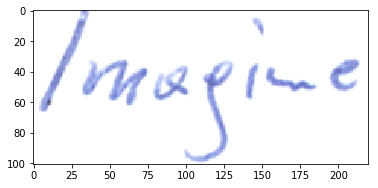

(101, 220, 3)
[255 255 255]


In [11]:
PATH = 'cvl-database-1-1/trainset/words/0002/0002-1-0-0-Imagine.tif'
img = plt.imread(PATH)

plt.imshow(img)
plt.show()

print(img.shape)
print(img[0][0])

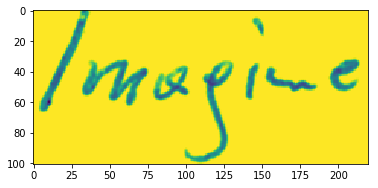

(101, 220)
255


In [12]:
img = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.show()
print(img.shape)
print(img[0][0])

In [0]:
def read_image(path, to_shape=SHAPE):
  """
  Read image from cvl database, normalize it, reshape to 120x40
  Return (image, len_of_image)
  """
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
  img = img.astype('float32')
  img /= 255.0
  img = cv2.resize(src=img, dsize=to_shape, interpolation=cv2.INTER_AREA)  # Resize image with bicubic interpolation 
  name = path.split('-')[-1][:-4]
  return (img, name)

Imagine
(40, 120)


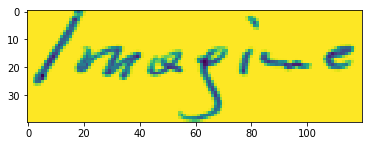

(40, 120)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.9815147  0.7697217
 0.65295357 0.76888514 0.951021   1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.   

In [14]:
img, name = read_image(PATH)
print(name)
print(img.shape)
plt.imshow(img)
plt.show()
print(img.shape)
print(img[0])

du 2
(40, 120)


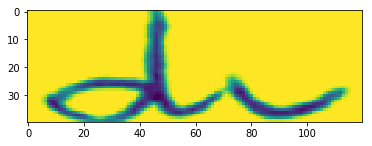

(40, 120)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.9994528
 0.9960785  0.9237485  0.8464991  0.74871206 0.71982515 0.79017377
 0.870928   0.99407923 0.9986231  1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.      

In [15]:
PATH1 = 'cvl-database-1-1/trainset/words/0001/0001-6-2-2-du.tif'
img, name = read_image(PATH1)
print(name, len(name))
print(img.shape)
plt.imshow(img)
plt.show()
print(img.shape)
print(img[0])

## Read data

In [0]:
images = []
writers = []
words = []
lengths = []

In [0]:
TRAINPATH = './cvl-database-1-1/trainset/words'
TESTPATH = './cvl-database-1-1/testset/words'

In [18]:
print(os.listdir(TRAINPATH))

['0028', '0024', '0004', '0003', '0005', '0025', '0018', '0027', '0016', '0012', '0050', '0026', '0020', '0021', '0041', '0006', '0042', '0022', '0023', '0014', '0029', '0002', '0015', '0001', '0047', '0013', '0017']


In [19]:
%%time
for writer in os.listdir(TRAINPATH):
  writer_path = os.path.join(TRAINPATH, writer)
  for image in os.listdir(writer_path):
    image_path = os.path.join(writer_path, image)
    img, name = read_image(image_path)
    
    # Add image to dataset
    images.append(img)
    writers.append(int(writer))
    words.append(name)
    lengths.append(len(name))

CPU times: user 5.87 s, sys: 792 ms, total: 6.66 s
Wall time: 6.67 s


In [20]:
%%time
for writer in os.listdir(TESTPATH):
  writer_path = os.path.join(TESTPATH, writer)
  for image in os.listdir(writer_path):
    image_path = os.path.join(writer_path, image)
    img, name = read_image(image_path)
    
    # Add image to dataset
    images.append(img)
    writers.append(int(writer))
    words.append(name)
    lengths.append(len(name))

CPU times: user 44.9 s, sys: 6.36 s, total: 51.3 s
Wall time: 51.4 s


In [21]:
len(images), len(writers), len(words), len(lengths)

(99904, 99904, 99904, 99904)

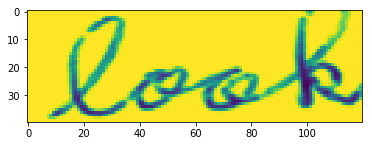

221
look
4


In [22]:
idx = np.random.randint(len(images))
plt.imshow(images[idx])
plt.show()
print(writers[idx])
print(words[idx])
print(lengths[idx])

In [23]:
print(len(set(words)))
print(set(words))

343
{'surface', 'great', '', 'vated', 'they', 'The', 'operating', 'is', 'sheet', 'you', 'schallen', 'built', 'his', 'was', 'puter', 'gons', 'country', 'Austrian', 'sing', 'should', 'universe', 'shape', 'verse', 'nickname', 'slave', 'mind', 'men', 'quote', 'Usher', 'Fesseln', 'poets', 'be', 'in', 'we', 'fallen', 'pean', 'maler', 'instead', 'dezimaler', 'ieve', 'fragments', 'than', 'realised', 'Dienstes', 'automat', 'correct', 'weak', 'European', 'walls', 'nature', 'magst', 'intellect', 'widened', 'While', 'by', 'dows', 'a', 'name', 'genius', 'then', 'variety', 'Augenblicke', 'smiling', 'he', 'generally', 'orb', 'calculation', 'für', 'our', 'not', 'logy', 'mighty', 'du', 'gehn', 'fortune', 'tomat', 'solely', 'Pentagons', 'Zemanek', 'schlagen', 'deserves', 'freely', 'were', "all's", 'Rechenautomat', 'Grunde', 'stehn', 'shadows', 'more', 'vorbey', 'said', 'paper', 'plants', 'Verweile', 'tarn', 'views', 'only', 'dank', 'of', 'brain', 'hard', "valour's", 'loved', 'Uhr', 'minion', 'rapid', 's

In [24]:
MAX_LENGTH = max(lengths)
MAX_LENGTH

13

In [25]:
MAX_WRITER = len(set(writers))  # It's ok
MAX_WRITER

310

In [26]:
import sys
sys.getsizeof(images)/1024/1024

0.7862701416015625

In [27]:
np.array(images).shape

(99904, 40, 120)

# Split data

## words>20

In [0]:
unique, counts = np.unique(words, return_counts=True)

In [29]:
print(dict(zip(unique, counts)))

{'': 314, '1955': 303, 'Alas': 310, 'American': 308, 'And': 309, 'Augenblicke': 309, 'Austrian': 308, 'Binär': 307, 'Dann': 1231, 'Die': 308, 'Dienstes': 308, 'Disdaining': 307, 'Es': 308, 'European': 305, 'Fesseln': 309, 'For': 309, 'Grunde': 307, 'Heinz': 306, 'Hexagons': 308, 'House': 27, 'I': 390, 'If': 306, 'Imagine': 310, 'It': 305, 'Like': 308, 'Lines': 309, 'Mailüfterl': 614, 'Nomacs': 309, 'Now': 27, 'Pentagons': 306, 'Rechenautomat': 288, "Show'd": 309, 'Squares': 307, 'Technology': 300, 'The': 615, 'Till': 309, 'Todtenglocke': 306, 'Triangles': 303, 'Typhoon': 306, 'Uhr': 308, 'University': 302, 'Usher': 27, 'Verweile': 309, 'Vienna': 299, 'Werd': 309, 'When': 308, 'Which': 303, 'While': 27, 'Whirlwind': 302, 'Wiener': 308, 'You': 135, 'Zeiger': 308, 'Zeit': 308, 'Zemanek': 306, 'a': 2230, 'about': 308, 'above': 307, 'ace': 1, 'achieve': 304, 'ago': 309, 'all': 27, "all's": 308, 'an': 616, 'and': 1728, 'angles': 1, 'animals': 307, 'any': 307, 'are': 27, 'art': 27, 'as': 27, 

In [0]:
MIN_WORDS = 20

In [31]:
drop_words = dict(map(lambda x: x, filter(lambda x: x[1]<=MIN_WORDS, list(zip(unique, counts)))))
print(drop_words)
print(drop_words.keys())

{'ace': 1, 'angles': 1, 'ating': 2, 'ation': 1, 'automat': 14, 'cution': 2, 'daining': 1, "dish'd": 1, 'dividuals': 1, 'dows': 1, 'erally': 1, 'erating': 1, 'face': 3, 'glocke': 1, 'gons': 2, 'ieve': 1, 'imaler': 1, 'ing': 1, "ish'd": 1, 'king': 1, 'land': 1, 'logy': 1, 'lüfterl': 2, 'maining': 1, 'maler': 1, 'mals': 1, 'mat': 4, 'men': 6, 'minous': 1, 'ned': 1, 'nology': 1, 'pean': 1, 'puter': 2, 'sing': 1, 'sistors': 1, 'tion': 1, 'tomat': 2, 'ures': 1, 'vated': 1, 'verse': 1, 'versity': 1, 'wind': 7}
dict_keys(['ace', 'angles', 'ating', 'ation', 'automat', 'cution', 'daining', "dish'd", 'dividuals', 'dows', 'erally', 'erating', 'face', 'glocke', 'gons', 'ieve', 'imaler', 'ing', "ish'd", 'king', 'land', 'logy', 'lüfterl', 'maining', 'maler', 'mals', 'mat', 'men', 'minous', 'ned', 'nology', 'pean', 'puter', 'sing', 'sistors', 'tion', 'tomat', 'ures', 'vated', 'verse', 'versity', 'wind'])


In [32]:
sum(drop_words.values())

77

In [33]:
idx = []
for i in range(len(words)):
  if words[i] in drop_words.keys():
    idx.append(i)
print(idx)
print(len(idx))

[1085, 2593, 2629, 2632, 4691, 4729, 5787, 9007, 10148, 11593, 12833, 13791, 15705, 15870, 18374, 19105, 19133, 19531, 20729, 20854, 21230, 21231, 21313, 22048, 22625, 23197, 24059, 24098, 28358, 28442, 28927, 30056, 31361, 32860, 33288, 37010, 37767, 37812, 38040, 39416, 44056, 44495, 46239, 51554, 51902, 51972, 51995, 52022, 53064, 58108, 64737, 68182, 68211, 68365, 71867, 74177, 74227, 78703, 78758, 81610, 82699, 83793, 84594, 84763, 85858, 87140, 88635, 90849, 90915, 92582, 95989, 96542, 96680, 97362, 97381, 98140, 98277]
77


In [0]:
images = np.delete(images, idx, axis=0)
writers = np.delete(writers, idx, axis=0)
words = np.delete(words, idx, axis=0)
lengths = np.delete(lengths, idx, axis=0)

In [35]:
len(images), len(writers), len(words), len(lengths)

(99827, 99827, 99827, 99827)

## lengths>0

In [36]:
idx = []
for i in range(len(lengths)):
  if lengths[i]==0:
    idx.append(i)
print(idx)
print(len(idx))

[699, 1165, 1232, 1402, 2301, 2373, 2390, 3305, 4735, 4937, 5229, 5764, 9399, 10124, 11316, 12273, 12681, 12909, 12928, 13157, 13410, 13747, 14030, 14641, 15229, 15367, 15573, 15608, 15750, 16231, 16585, 17131, 17709, 17989, 18171, 18642, 18795, 18967, 19077, 19115, 19466, 19781, 20208, 20766, 20801, 20964, 21057, 21142, 21276, 21426, 22097, 22344, 22624, 22991, 23161, 23194, 23315, 23671, 23837, 23923, 24034, 24434, 24579, 25128, 25659, 25759, 26314, 26571, 27137, 27853, 28050, 28390, 28438, 28459, 28804, 28889, 28890, 29705, 29809, 30088, 30959, 31010, 31604, 31868, 31962, 32597, 32839, 32924, 33431, 33654, 34040, 34181, 34656, 34995, 35080, 35533, 36312, 36674, 37200, 37754, 37789, 37840, 37910, 37929, 38229, 38644, 39065, 39223, 39351, 39530, 39891, 40265, 40362, 41305, 41638, 42014, 42181, 42413, 42840, 42905, 43447, 43573, 43917, 44445, 44676, 44820, 45191, 45256, 45542, 45833, 46086, 46443, 46836, 46883, 47494, 48023, 48182, 48471, 49000, 49102, 49450, 49835, 50085, 50318, 50696

In [37]:
words[699]

''

In [0]:
images = np.delete(images, idx, axis=0)
writers = np.delete(writers, idx, axis=0)
words = np.delete(words, idx, axis=0)
lengths = np.delete(lengths, idx, axis=0)

In [39]:
len(images), len(writers), len(words), len(lengths)  # 99_513 its ok!

(99513, 99513, 99513, 99513)

## train_test_split

In [40]:
images_train, images_test, writers_lengths_train, writers_lengths_test = model_selection.train_test_split(images, np.array(list(zip(writers, lengths))), random_state=seed_value, test_size=0.288, stratify=writers)
images_train.shape, images_test.shape, writers_lengths_train.shape, writers_lengths_test.shape

((70853, 40, 120), (28660, 40, 120), (70853, 2), (28660, 2))

In [41]:
writers_lengths_train[:10]

array([[387,   3],
       [180,   6],
       [165,   6],
       [242,   7],
       [935,   2],
       [254,   7],
       [599,   5],
       [244,   4],
       [706,   2],
       [209,   7]])

In [42]:
writers_train = np.array(list(map(lambda x: x[0], writers_lengths_train)))
lengths_train = np.array(list(map(lambda x: x[1], writers_lengths_train)))
writers_test = np.array(list(map(lambda x: x[0], writers_lengths_test)))
lengths_test = np.array(list(map(lambda x: x[1], writers_lengths_test)))
writers_train.shape, lengths_train.shape, writers_test.shape, lengths_test.shape

((70853,), (70853,), (28660,), (28660,))

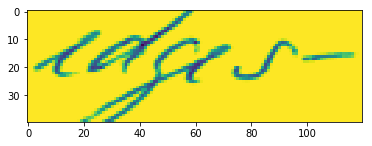

29
5


In [43]:
i = np.random.randint(images_train.shape[0])  # small check
plt.imshow(images_train[i])
plt.show()
print(writers_train[i])
print(lengths_train[i])

# Prepare data

In [44]:
images_train = np.expand_dims(images_train, axis=3)
images_test = np.expand_dims(images_test, axis=3)
images_train.shape, images_test.shape

((70853, 40, 120, 1), (28660, 40, 120, 1))

In [45]:
writers_train[:10]

array([387, 180, 165, 242, 935, 254, 599, 244, 706, 209])

In [46]:
print(sorted(set(writers)))
print(len(sorted(set(writers))))

[1, 2, 3, 4, 5, 6, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 41, 42, 47, 50, 52, 53, 57, 58, 59, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 95, 96, 97, 98, 152, 153, 155, 156, 157, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 262, 263, 265, 285, 286, 287, 288, 289, 290, 291, 299, 309, 311, 312, 313, 322, 324, 327, 358, 363, 368, 369, 374, 383, 384, 386, 387, 388, 390, 391, 392, 393, 394, 395, 396, 398, 399, 400, 403, 405, 408, 410, 411, 412, 413, 418, 425, 429, 430, 431, 432, 476, 477, 479, 481, 482, 485, 507, 510, 519, 520, 522, 524, 525, 527, 528, 53

In [0]:
# OneHot Encoding
class OneHot():  
  # classes = set of writers
  # n = len(writers)  
  
  def __init__(self, classes):
    self.classes = sorted(classes)
    self.n = len(classes)
    
  def encode(self, class_name):
    one_hot = np.zeros(shape=(self.n), dtype=np.int8)
    class_index = self.classes.index(class_name)
    one_hot[class_index] = 1
    return one_hot
  
  def encode_all(self, list_class_names):
    return np.array([self.encode(class_name) for class_name in list_class_names])
  
  def decode(self, one_hot):
    class_index = one_hot.argmax()
    return self.classes[class_index]
  
  def decode_all(self, list_one_hots):
    return np.array([self.decode(one_hot) for one_hot in list_one_hots])

In [0]:
OH_W = OneHot(sorted(set(writers)))

In [49]:
writers_train = OH_W.encode_all(writers_train)
writers_test = OH_W.encode_all(writers_test)
writers_train.shape, writers_test.shape

((70853, 310), (28660, 310))

In [50]:
images_train[0].shape

(40, 120, 1)

In [51]:
lengths_train[:10]

array([3, 6, 6, 7, 2, 7, 5, 4, 2, 7])

In [0]:
OH_L = OneHot(sorted(set(lengths)))

In [53]:
lengths_train = OH_L.encode_all(lengths_train)
lengths_test = OH_L.encode_all(lengths_test)
lengths_train.shape, lengths_test.shape

((70853, 13), (28660, 13))

In [54]:
set(lengths)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

# Model1

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, LeakyReLU, Concatenate, Add, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, LambdaCallback

import keras.backend as K

In [0]:
K.clear_session()

In [0]:
x_input = Input(shape=(40, 120, 1))
F1 = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(x_input)
F1 = LeakyReLU(alpha=0.1)(F1)
F1 = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F1)
F1 = LeakyReLU(alpha=0.1)(F1)
F1 = MaxPooling2D(pool_size=(2, 2), strides=2)(F1)

F2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F1)
F2 = LeakyReLU(alpha=0.1)(F2)
F2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F2)
F2 = LeakyReLU(alpha=0.1)(F2)
F2 = MaxPooling2D(pool_size=(2, 2), strides=2)(F2)

F3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F2)
F3 = LeakyReLU(alpha=0.1)(F3)
F3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F3)
F3 = LeakyReLU(alpha=0.1)(F3)
F3 = MaxPooling2D(pool_size=(2, 2), strides=2)(F3)

F4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F3)
F4 = LeakyReLU(alpha=0.1)(F4)
F4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F4)
F4 = LeakyReLU(alpha=0.1)(F4)
F4 = MaxPooling2D(pool_size=(2, 2), strides=2)(F4)

T = Flatten()(F4)
T = Dense(units=4096, kernel_initializer='glorot_uniform')(T)
T = LeakyReLU(alpha=0.1)(T)
T = Dropout(rate=0.5)(T)
T = Dense(units=1096, kernel_initializer='glorot_uniform')(T)
T = LeakyReLU(alpha=0.1, name='next_to_last')(T)
T = Dropout(rate=0.5)(T)
T = Dense(units=MAX_WRITER, activation='softmax', kernel_initializer='glorot_uniform', name='last')(T)

In [0]:
model1 = Model(inputs=x_input, outputs=T, name='Network')

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40, 120, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 120, 64)       640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 120, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 120, 64)       36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 40, 120, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 60, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 60, 128)       73856     
__________

In [0]:
model1.compile(loss=categorical_crossentropy, optimizer=Adam(lr=0.0001), metrics=['acc'])

In [0]:
plot_model(model1, to_file='Model1_plot.png', show_shapes=True, show_layer_names=True)

# Train Model1

In [0]:
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1, mode='min', #add min_delta
                           cooldown=2, min_le=1e-8)

estop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='min')

excel = CSVLogger(filename='./Model1_stats.csv', separator=',', append=False)

checkp = ModelCheckpoint('./Model1_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)

In [0]:
history = model1.fit(images_train, writers_train, verbose=1, epochs=40, batch_size=100, validation_split=0.1, shuffle=True, callbacks=[reduce, estop, excel, checkp])

Train on 63767 samples, validate on 7086 samples
Epoch 1/40
63767/63767 [==============================] - 212s 3ms/step - loss: 5.4953 - acc: 0.0075 - val_loss: 4.9217 - val_acc: 0.0182

Epoch 00001: val_loss improved from inf to 4.92167, saving model to ./Model1_weights.h5
Epoch 2/40
63767/63767 [==============================] - 210s 3ms/step - loss: 4.6728 - acc: 0.0398 - val_loss: 4.0414 - val_acc: 0.0955

Epoch 00002: val_loss improved from 4.92167 to 4.04139, saving model to ./Model1_weights.h5
Epoch 3/40
63767/63767 [==============================] - 210s 3ms/step - loss: 3.7072 - acc: 0.1349 - val_loss: 3.0979 - val_acc: 0.2530

Epoch 00003: val_loss improved from 4.04139 to 3.09786, saving model to ./Model1_weights.h5
Epoch 4/40
63767/63767 [==============================] - 210s 3ms/step - loss: 3.0849 - acc: 0.2313 - val_loss: 2.6391 - val_acc: 0.3345

Epoch 00004: val_loss improved from 3.09786 to 2.63911, saving model to ./Model1_weights.h5
Epoch 5/40
63767/63767 [=======

# Evaluate Model1

In [0]:
model1.load_weights('./Model1_weights.h5')

In [0]:
model1.evaluate(images_test, writers_test)

28660/28660 [==============================] - 35s 1ms/step


[1.2218265160762256, 0.6862526168710106]

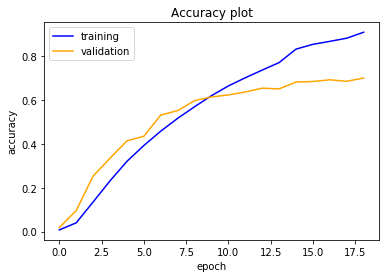

In [0]:
epoch = history.epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.title('Accuracy plot')
plt.plot(epoch, acc, color='blue', label='training')
plt.plot(epoch, val_acc, color='orange', label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

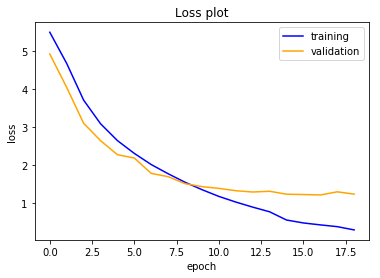

In [0]:
epoch = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.title('Loss plot')
plt.plot(epoch, loss, color='blue', label='training')
plt.plot(epoch, val_loss, color='orange', label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [0]:
def test1(images, writers, N=1):
  unique, counts = np.unique(OH_W.decode_all(writers), return_counts=True)  # Ok, svi imaju vise od 20
  _writers = dict(zip(unique, counts))
  writers_decoded = OH_W.decode_all(writers)
  T = 0
  F = 0
  for _writer in _writers.keys():
    _images = images[writers_decoded == _writer]
    indexes = [np.random.randint(len(_images)) for _ in range(N)]
    prediction = OH_W.decode_all(model1.predict(_images[indexes]))
    
    count = Counter(prediction)
    if _writer==count.most_common(1)[0][0]:
      T += 1
    else:
      F += 1
  return T/(T+F)

In [0]:
%%time
M = 20
for N in [1, 5, 10]:
  print('N: ', N, end='')
  acc = 0
  for _ in range(M):
    acc += test1(images_test, writers_test, N=N)
  acc /= M
  print(' Accuracy: ', acc)

N:  1 Accuracy:  0.6770967741935483
N:  5 Accuracy:  0.9066129032258063
N:  10 Accuracy:  0.976935483870968
CPU times: user 1min 38s, sys: 26.9 s, total: 2min 5s
Wall time: 3min 56s


In [0]:
finder = Model(inputs=model1.input, outputs=model1.get_layer('last').output)

In [0]:
finder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40, 120, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 120, 64)       640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 120, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 120, 64)       36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 40, 120, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 60, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 60, 128)       73856     
__________

In [0]:
def test2(images, writers, N=1):
  unique, counts = np.unique(OH_W.decode_all(writers), return_counts=True)  
  _writers = dict(zip(unique, counts))
  writers_decoded = OH_W.decode_all(writers)
  T = 0
  F = 0
  for _writer in _writers.keys():
    _images = images[writers_decoded == _writer]
    indexes = [np.random.randint(len(_images)) for _ in range(N)]
    prediction = np.zeros((310,))
    for i in indexes:
      prediction += finder.predict(np.array([_images[i]]))[0]
    prediction /= N

    _prediction = np.zeros((310,))
    _prediction[np.argmax(prediction)] = 1
    if _writer==OH_W.decode(_prediction):
      T += 1
    else:
      F += 1
  return T/(T+F)

In [0]:
%%time
M = 20
for N in [1, 5, 10]:
  print('N: ', N, end='')
  acc = 0
  for _ in range(M):
    acc += test2(images_test, writers_test, N=N)
  acc /= M
  print(' Accuracy: ', acc)

N:  1 Accuracy:  0.6790322580645162
N:  5 Accuracy:  0.9503225806451615
N:  10 Accuracy:  0.988709677419355
CPU times: user 5min 28s, sys: 1min 23s, total: 6min 51s
Wall time: 9min 35s


In [0]:
semi_finder = Model(inputs=model1.input, outputs=model1.get_layer('next_to_last').output)

In [0]:
semi_finder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40, 120, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 120, 64)       640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 120, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 120, 64)       36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 40, 120, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 60, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 60, 128)       73856     
__________

In [0]:
x_input = Input(shape=(1096,))
x = LeakyReLU(alpha=0.1, name='next_to_last')(x_input)
y = Dense(units=MAX_WRITER, activation='sigmoid', kernel_initializer='glorot_uniform', name='last')(x)
finalizer = Model(inputs=x_input, outputs=y)
finalizer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1096)              0         
_________________________________________________________________
next_to_last (LeakyReLU)     (None, 1096)              0         
_________________________________________________________________
last (Dense)                 (None, 310)               340070    
Total params: 340,070
Trainable params: 340,070
Non-trainable params: 0
_________________________________________________________________


In [0]:
finalizer.set_weights(model1.get_weights()[-2:])

In [0]:
def test3(images, writers, N=1):
  unique, counts = np.unique(OH_W.decode_all(writers), return_counts=True)  
  _writers = dict(zip(unique, counts))
  writers_decoded = OH_W.decode_all(writers)
  T = 0
  F = 0
  for _writer in _writers.keys():
    _images = images[writers_decoded == _writer]
    indexes = [np.random.randint(len(_images)) for _ in range(N)]
    prediction = np.zeros((1096,))
    for i in indexes:
      prediction += semi_finder.predict(np.array([_images[i]]))[0]
    prediction /= N

    if _writer==OH_W.decode(finalizer.predict(np.array([prediction]))[0]):
      T += 1
    else:
      F += 1
  return T/(T+F)

In [0]:
%%time
M = 20
for N in [1, 5, 10]:
  print('N: ', N, end='')
  acc = 0
  for _ in range(M):
    acc += test3(images_test, writers_test, N=N)
  acc /= M
  print(' Accuracy: ', acc)

N:  1 Accuracy:  0.6699999999999999
N:  5 Accuracy:  0.9875806451612904
N:  10 Accuracy:  0.9972580645161291
CPU times: user 5min 25s, sys: 1min 25s, total: 6min 50s
Wall time: 9min 37s


# Model2

In [56]:
K.clear_session()

W0708 07:22:25.667625 139875634698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0708 07:22:25.670102 139875634698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 07:22:25.706682 139875634698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [57]:
x_input = Input(shape=(40, 120, 1))
F1 = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(x_input)
F1 = LeakyReLU(alpha=0.1)(F1)
F1 = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F1)
F1 = LeakyReLU(alpha=0.1)(F1)
F1 = MaxPooling2D(pool_size=(2, 2), strides=2)(F1)

F2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F1)
F2 = LeakyReLU(alpha=0.1)(F2)
F2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F2)
F2 = LeakyReLU(alpha=0.1)(F2)
F2 = MaxPooling2D(pool_size=(2, 2), strides=2)(F2)

G2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F1)
G2 = LeakyReLU(alpha=0.1)(G2)
G2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G2)
G2 = LeakyReLU(alpha=0.1)(G2)
G2 = MaxPooling2D(pool_size=(2, 2), strides=2)(G2)

C2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G2)
C2 = LeakyReLU(alpha=0.1)(C2)
C2 = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(C2)
C2 = LeakyReLU(alpha=0.1)(C2)
_C2 = Add()([F2, C2])

F3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(_C2)
F3 = LeakyReLU(alpha=0.1)(F3)
F3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F3)
F3 = LeakyReLU(alpha=0.1)(F3)
F3 = MaxPooling2D(pool_size=(2, 2), strides=2)(F3)

G3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G2)
G3 = LeakyReLU(alpha=0.1)(G3)
G3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G3)
G3 = LeakyReLU(alpha=0.1)(G3)
G3 = MaxPooling2D(pool_size=(2, 2), strides=2)(G3) 

C3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G3)
C3 = LeakyReLU(alpha=0.1)(C3)
C3 = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(C3)
C3 = LeakyReLU(alpha=0.1)(C3)
_C3 = Add()([F3, C3])

F4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(_C3)
F4 = LeakyReLU(alpha=0.1)(F4)
F4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(F4)
F4 = LeakyReLU(alpha=0.1)(F4)
F4 = MaxPooling2D(pool_size=(2, 2), strides=2)(F4)

G4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G3)
G4 = LeakyReLU(alpha=0.1)(G4)
G4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G4)
G4 = LeakyReLU(alpha=0.1)(G4)
G4 = MaxPooling2D(pool_size=(2, 2), strides=2)(G4)

C4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(G4)
C4 = LeakyReLU(alpha=0.1)(C4)
C4 = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(C4)
C4 = LeakyReLU(alpha=0.1)(C4)
_C4 = Add()([F4, C4])

T = Flatten()(_C4)
T = Dense(units=4096, kernel_initializer='glorot_uniform')(T)
T = LeakyReLU(alpha=0.1)(T)
T = Dropout(rate=0.5)(T)
T = Dense(units=1096, kernel_initializer='glorot_uniform')(T)
T = LeakyReLU(alpha=0.1, name='next_to_last')(T)
T = Dropout(rate=0.5)(T)
T = Dense(units=MAX_WRITER, activation='softmax', kernel_initializer='glorot_uniform', name='output_T')(T)

R = Flatten()(G4)
R = Dense(units=4096, kernel_initializer='glorot_uniform')(R)
R = LeakyReLU(alpha=0.1)(R)
R = Dropout(rate=0.5)(R)
R = Dense(units=1096, kernel_initializer='glorot_uniform')(R)
R = LeakyReLU(alpha=0.1)(R)
R = Dropout(rate=0.5)(R)
R = Dense(units=MAX_LENGTH, activation='softmax', kernel_initializer='glorot_uniform', name='output_R')(R)

O = Concatenate(axis=1, name='output_O')([T, R])

W0708 07:22:26.758621 139875634698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 07:22:26.766458 139875634698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 07:22:26.826241 139875634698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0708 07:22:27.254263 139875634698112 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please us

In [58]:
T, R, O

(<tf.Tensor 'output_T/Softmax:0' shape=(?, 310) dtype=float32>,
 <tf.Tensor 'output_R/Softmax:0' shape=(?, 13) dtype=float32>,
 <tf.Tensor 'output_O/concat:0' shape=(?, 323) dtype=float32>)

In [0]:
model2 = Model(inputs=x_input, outputs=[T, R, O], name='Model2')

In [60]:
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 120, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 120, 64)  640         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 40, 120, 64)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 40, 120, 64)  36928       leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [61]:
alpha = K.variable(value=0.5, dtype='float32', name='alpha')
alpha

<tf.Variable 'alpha:0' shape=() dtype=float32_ref>

In [0]:
def CustomLoss(y_true, y_pred):
  y_true1 = y_true[:, :MAX_WRITER]
  y_true2 = y_true[:, MAX_WRITER:]

  y_pred1 = y_pred[:, :MAX_WRITER]
  y_pred2 = y_pred[:, MAX_WRITER:]
  
  return alpha*K.categorical_crossentropy(y_true1, y_pred1)+(1-alpha)*K.categorical_crossentropy(y_true2, y_pred2)

In [63]:
model2.compile(optimizer=Adam(lr=0.0001), \
               loss={'output_T' : categorical_crossentropy, 'output_R': categorical_crossentropy, 'output_O': CustomLoss}, \
               loss_weights={'output_T': 0, 'output_R': 0, 'output_O':1}, \
               metrics=['acc'])

W0708 07:22:36.468683 139875634698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
plot_model(model2, to_file='advanced_plot.png', show_shapes=True, show_layer_names=True)

# Train Model2

In [0]:
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min', #add min_delta
                           cooldown=2, min_le=1e-8)

estop = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='min')

excel = CSVLogger(filename='./Model2_stats.csv', separator=',', append=False)

checkp = ModelCheckpoint('./Model2_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)

def podesi(epoch):
  if epoch in [10, 13, 16, 19, 22, 25, 28]:
    K.set_value(alpha, 0.5+(epoch+1)*0.066)
alphaChanger = LambdaCallback(on_epoch_end=lambda epoch, _: podesi(epoch))  

In [0]:
history = model2.fit(images_train, [writers_train, lengths_train, np.concatenate((writers_train, lengths_train), axis=1)], \
                    verbose=1, epochs=40, batch_size=100, validation_split=0.1, callbacks=[reduce, estop, excel, checkp, alphaChanger])

W0708 07:24:45.563031 139875634698112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 63767 samples, validate on 7086 samples
Epoch 1/40
63767/63767 [==============================] - 445s 7ms/step - loss: 3.4385 - output_T_loss: 5.3876 - output_R_loss: 1.4894 - output_O_loss: 3.4385 - output_T_acc: 0.0128 - output_R_acc: 0.4214 - output_O_acc: 1.8819e-04 - val_loss: 2.7620 - val_output_T_loss: 4.5518 - val_output_R_loss: 0.9722 - val_output_O_loss: 2.7620 - val_output_T_acc: 0.0569 - val_output_R_acc: 0.6205 - val_output_O_acc: 5.6449e-04

Epoch 00001: val_loss improved from inf to 2.76202, saving model to ./Model2_weights.h5
Epoch 2/40
63767/63767 [==============================] - 427s 7ms/step - loss: 2.4211 - output_T_loss: 4.0397 - output_R_loss: 0.8025 - output_O_loss: 2.4211 - output_T_acc: 0.1009 - output_R_acc: 0.6883 - output_O_acc: 0.0077 - val_loss: 1.9032 - val_output_T_loss: 3.1859 - val_output_R_loss: 0.6204 - val_output_O_loss: 1.9032 - val_output_T_acc: 0.2305 - val_output_R_acc: 0.7639 - val_output_O_acc: 0.0193

Epoch 00002: val_loss improve

In [0]:
!cp './Model2_weight.h5' './drive/My Drive/ml_sem/'

# Evaluate Model2

In [0]:
#model2.load_weights('./Model2_weights.h5')

In [0]:
results = model2.evaluate(images_test, [writers_test, lengths_test, np.concatenate((writers_test, lengths_test), axis=1)])

In [0]:
for result in zip(model2.metrics_names, results):
  print(result[0], ' : ', result[1])

In [0]:
history.history.keys()

In [0]:
epoch = history.epoch
acc = history.history['output_T_acc']
val_acc = history.history['val_output_T_acc']
plt.title('Accuracy plot writer identification')
plt.plot(epoch, acc, color='blue', label='training')
plt.plot(epoch, val_acc, color='orange', label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [0]:
epoch = history.epoch
loss = history.history['output_T_loss']
val_loss = history.history['val_output_T_loss']
plt.title('Loss plot writer identification')
plt.plot(epoch, loss, color='blue', label='training')
plt.plot(epoch, val_loss, color='orange', label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [0]:
epoch = history.epoch
fig = plt.figure(figsize=(7, 7))
accT = history.history['output_T_acc']
accR = history.history['output_R_acc']
accO = history.history['output_O_acc']
vaccT = history.history['val_output_T_acc']
vaccR = history.history['val_output_R_acc']
vaccO = history.history['val_output_O_acc']
plt.title('Accuracy plot main/auxilary/both task')
plt.plot(epoch, accT, color='green', label='Writer Identification')
plt.plot(epoch, accR, color='red', label='Word Length')
plt.plot(epoch, accO, color='blue', label='Both task')
plt.plot(epoch, vaccT, 'g--', label='Writer Identification Valid')
plt.plot(epoch, vaccR, 'r--', label='Word Length Valid')
plt.plot(epoch, vaccO, 'b--', label='Both task Valid')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [0]:
epoch = history.epoch
fig = plt.figure(figsize=(7, 7))
accT = history.history['output_T_loss']
accR = history.history['output_R_loss']
accO = history.history['output_O_loss']
vaccT = history.history['val_output_T_loss']
vaccR = history.history['val_output_R_loss']
vaccO = history.history['val_output_O_loss']
plt.title('Loss plot main/auxilary/both task')
plt.plot(epoch, accT, color='green', label='Writer Identification')
plt.plot(epoch, accR, color='red', label='Word Length')
plt.plot(epoch, accO, color='blue', label='Both task')
plt.plot(epoch, vaccT, 'g--', label='Writer Identification Valid')
plt.plot(epoch, vaccR, 'r--', label='Word Length Valid')
plt.plot(epoch, vaccO, 'b--', label='Both task Valid')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [0]:
def test1(images, writers, N=1):
  unique, counts = np.unique(OH_W.decode_all(writers), return_counts=True)  # Ok, svi imaju vise od 20
  _writers = dict(zip(unique, counts))
  writers_decoded = OH_W.decode_all(writers)
  T = 0
  F = 0
  for _writer in _writers.keys():
    _images = images[writers_decoded == _writer]
    indexes = [np.random.randint(len(_images)) for _ in range(N)]
    prediction = [OH_W.decode(model2.predict(np.array([_images[i]]))[0]) for i in indexes]
    
    count = Counter(prediction)
    if _writer==count.most_common(1)[0][0]:
      T += 1
    else:
      F += 1
  return T/(T+F)

In [0]:
%%time
M = 20
for N in [1, 5, 10]:
  print('N: ', N, end='')
  acc = 0
  for _ in range(M):
    acc += test1(images_test, writers_test, N=N)
  acc /= M
  print(' Accuracy: ', acc)

In [0]:
finder = Model(inputs=model2.input, outputs=model2.get_layer('output_T').output)

In [0]:
finder.summary()

In [0]:
def test2(images, writers, N=1):
  unique, counts = np.unique(OH_W.decode_all(writers), return_counts=True)  
  _writers = dict(zip(unique, counts))
  writers_decoded = OH_W.decode_all(writers)
  T = 0
  F = 0
  for _writer in _writers.keys():
    _images = images[writers_decoded == _writer]
    indexes = [np.random.randint(len(_images)) for _ in range(N)]
    prediction = np.zeros((310,))
    for i in indexes:
      prediction += finder.predict(np.array([_images[i]]))[0]
    prediction /= N

    _prediction = np.zeros((310,))
    _prediction[np.argmax(prediction)] = 1
    if _writer==OH_W.decode(_prediction):
      T += 1
    else:
      F += 1
  return T/(T+F)

In [0]:
%%time
M = 20  
for N in [1, 5, 10]:
  print('N: ', N, end='')
  acc = 0
  for _ in range(M):
    acc += test2(images_test, writers_test, N=N)
  acc /= M
  print(' Accuracy: ', acc)

In [0]:
semi_finder = Model(inputs=model2.input, outputs=model2.get_layer('next_to_last').output)

In [0]:
semi_finder.summary()

In [0]:
x_input = Input(shape=(1096,))
x = LeakyReLU(alpha=0.1, name='next_to_last')(x_input)
y = Dense(units=MAX_WRITER, activation='sigmoid', kernel_initializer='glorot_uniform', name='last')(x)
finalizer = Model(inputs=x_input, outputs=y)
finalizer.summary()

In [0]:
finalizer.weights

In [0]:
model2.weights

In [0]:
finalizer.set_weights(model2.get_weights()[-4:-2])

In [0]:
def test3(images, writers, N=1):
  unique, counts = np.unique(OH_W.decode_all(writers), return_counts=True)  
  _writers = dict(zip(unique, counts))
  writers_decoded = OH_W.decode_all(writers)
  T = 0
  F = 0
  for _writer in _writers.keys():
    _images = images[writers_decoded == _writer]
    indexes = [np.random.randint(len(_images)) for _ in range(N)]
    prediction = np.zeros((1096,))
    for i in indexes:
      prediction += semi_finder.predict(np.array([_images[i]]))[0]
    prediction /= N

    if _writer==OH_W.decode(finalizer.predict(np.array([prediction]))[0]):
      T += 1
    else:
      F += 1
  return T/(T+F)

In [0]:
%%time
M = 20
for N in [1, 5, 10]:
  print('N: ', N, end='')
  acc = 0
  for _ in range(M):
    acc += test3(images_test, writers_test, N=N)
  acc /= M
  print(' Accuracy: ', acc)